# R tidyverse quick example

R has had undergone a bit of a revolution of sorts in the past few years. There has been a coordinated effort to develop a collection of code focusing on the major use cases for data science. Rstudio, the developer of the well known R/python IDE, in specific, has been a major leader in this effort, but there have also too many open source contributors to mention. The result is a pleasant and easy to learn data science environment. In this course, we'll focus on the "tidy" data analysis. 

Let's start with the [definition of a tidy dataset](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). To quote:

```{note}
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

1. Every column is a variable.
2. Every row is an observation.
3. Every cell is a single value.

```
The set of tidyverse focus on tidy data, but with a common syntax and set of conventions. You can install the tidyverse with the R command `install.packages("tidyverse")`, which only needs to be done once. You can add the tidyverse to a conda environment with `conda install -c r r-tidyverse` .

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Make note of the conflict `filter` which is both used to filter rows a dataframe and in signal processing. The `::` looks for functions in that package. You can use that if you want to quickly use a function without loading the package.

Let's read in our data that we worked with previously. Note the function `data` is taken in R, so it's best not to use it to define a dataset. Better to just use `dat` or something like that.

In [6]:
dat = read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")
head(dat)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  rawid = col_character(),
  roi = col_character(),
  volume = col_double(),
  min = col_double(),
  max = col_double(),
  mean = col_double(),
  std = col_double(),
  type = col_double(),
  level = col_double()
)


X1,rawid,roi,volume,min,max,mean,std,type,level
1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
5,kirby127a_3_1_ax.img,Mesencephalon,10268,55,307,230.8583,29.2249,1,1
6,kirby127a_3_1_ax.img,Metencephalon,159402,2,299,138.5200,52.2241,1,1


I don't need the `X1` or `rawid` columns, let's get rid of those. Note the pipe operator `%>%` is really useful. Think of it as funneling the output from the previous statement to the next. So, below the first statement, `dat`, just returns the dataset itself then it gets passed to `select`. Of note, the newer versions of R have a built in pipe operator whereas the one we're using is part of a package called magrittr. 

The negative signs in front of the variables mean to remove them.

In [9]:
dat = dat %>% select(-X1, -rawid)
dat %>% head

roi,volume,min,max,mean,std,type,level
Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
Mesencephalon,10268,55,307,230.8583,29.2249,1,1
Metencephalon,159402,2,299,138.5200,52.2241,1,1


Let's get the Type 1 Level 1 data. 

In [10]:
t1l1 = dat %>% filter(type == 1, level == 1)
t1l1

roi,volume,min,max,mean,std,type,level
Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
Diencephalon_R,9678,10,335,193.7051,32.7869,1,1
Mesencephalon,10268,55,307,230.8583,29.2249,1,1
Metencephalon,159402,2,299,138.5200,52.2241,1,1
Myelencephalon,4973,12,286,199.8497,36.6501,1,1
CSF,109776,0,258,33.0193,26.3262,1,1


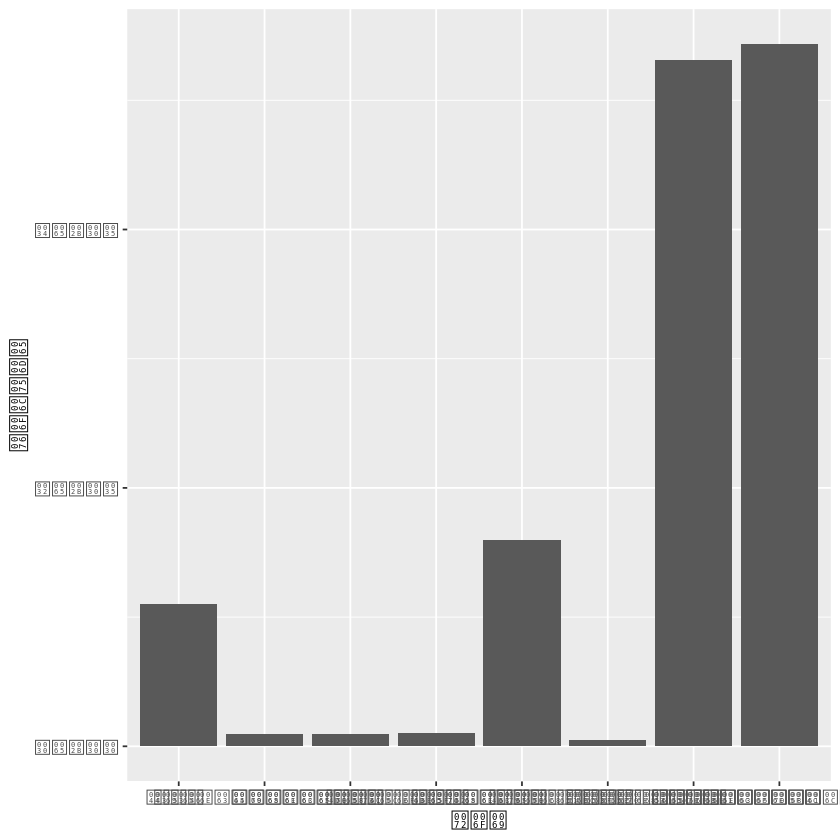

In [21]:
# Note this may not be rendering correctly b/c of my X11 fonts not being set up
g = ggplot(data = t1l1, aes(x = roi, y = volume)) + geom_col()
g